In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

## Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

In [4]:
n = 100
x = np.linspace(np.pi/6, 5*np.pi/3, n)
y = 4*np.sin(x) + 0.5*np.random.randn(n)

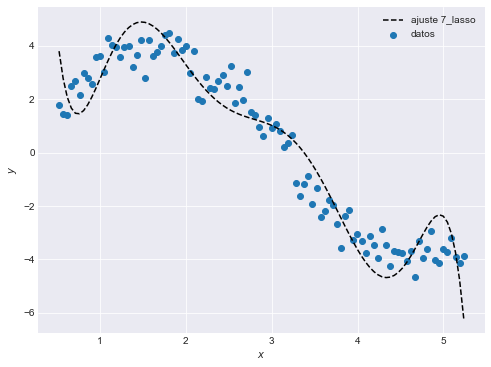

In [6]:
def obj_lasso(b, x, y, n, l):
    return np.sum((y-np.array([x**i for i in range(n+1)]).T.dot(b))**2)+l*np.linalg.norm(b,1)

b0 = np.random.random((8,))
res = opt.minimize(obj_lasso, b0, args=(x,y,7,0.1))
yhat7_lasso = np.array([x**j for j in range(8)]).T.dot(res.x)

plt.figure(figsize=(8,6))
plt.scatter(x, y, label = 'datos')
plt.plot(x, yhat7_lasso, '--k', label = 'ajuste 7_lasso')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()